# 3for2 IAQ Data from BMS

Clayton Miller
Feb 22, 2017

Here we will take the old and new space results and 

In [1]:
import pandas as pd
from influxdb import DataFrameClient
import pytz
import seaborn as sns
import json
import datetime
import matplotlib.pyplot as plt
import os
from pylab import *
from __future__ import division

In [2]:
%matplotlib inline

## Grab the already downloaded data

In [3]:
oldlist = os.listdir("/Users/Clayton/3for2-DataAnalytics/IAQ/extracted_data/old_space/targeted_data/")

In [4]:
oldlist

['OldSpaceIAQ_IR.csv',
 'Room Air CO2.csv',
 'Room Air Particles.csv',
 'Room Air Rel. Humidity.csv',
 'Room Air Temperature.csv',
 'Volatile Organic Compounds.csv']

In [29]:
oldlist = ['Room Air Temperature.csv','Room Air Rel. Humidity.csv',
 'Room Air CO2.csv',
 'Room Air Particles.csv'] #,'Volatile Organic Compounds.csv' 'OldSpaceIAQ_IR.csv'

In [30]:
olddata = []#pd.DataFrame()
for filename in oldlist:
    df = pd.read_csv("/Users/Clayton/3for2-DataAnalytics/IAQ/extracted_data/old_space/targeted_data/"+filename, index_col="Unnamed: 0")
    olddata.append(df)
    #print df.head()
olddata_df = pd.concat(olddata, axis=0)

In [31]:
df.head()

,Zones,Value,Occupancy Type,Unit
0,Zone 1,2.177054,Working Hours,Particles [micrograms/m3]
1,Zone 1,9.475123,Working Hours,Particles [micrograms/m3]
2,Zone 1,7.991237,Working Hours,Particles [micrograms/m3]
3,Zone 1,9.607631,Working Hours,Particles [micrograms/m3]
4,Zone 1,5.279573,Working Hours,Particles [micrograms/m3]


In [32]:
olddata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643 entries, 0 to 749
Data columns (total 4 columns):
Zones             5643 non-null object
Value             5642 non-null float64
Occupancy Type    5643 non-null object
Unit              5643 non-null object
dtypes: float64(1), object(3)
memory usage: 220.4+ KB


In [33]:
olddata_df.head()

,Zones,Value,Occupancy Type,Unit
0,Zone 1,21.676001,Working Hours,Temp [deg. C]
1,Zone 1,21.712000,Working Hours,Temp [deg. C]
2,Zone 1,21.430001,Working Hours,Temp [deg. C]
3,Zone 1,21.466000,Working Hours,Temp [deg. C]
4,Zone 1,21.526000,Working Hours,Temp [deg. C]


In [34]:
olddata_df["Phase"] = "Previous Office" 

In [35]:
olddata_df.head()

,Zones,Value,Occupancy Type,Unit,Phase
0,Zone 1,21.676001,Working Hours,Temp [deg. C],Previous Office
1,Zone 1,21.712000,Working Hours,Temp [deg. C],Previous Office
2,Zone 1,21.430001,Working Hours,Temp [deg. C],Previous Office
3,Zone 1,21.466000,Working Hours,Temp [deg. C],Previous Office
4,Zone 1,21.526000,Working Hours,Temp [deg. C],Previous Office


## New Data

In [67]:
newlist = os.listdir("/Users/Clayton/3for2-DataAnalytics/IAQ/extracted_data/new_space/targeted_data/")

In [68]:
newlist

['Air Relative Humidity.csv',
 'AirflowRate.csv',
 'AirMod.csv',
 'AirSystemCO2.csv',
 'Carbon Dioxide (CO2) -- Adhoc Sensors.csv',
 'Carbon Dioxide (CO2) -- BMS Sensors.csv',
 'Carbon Dioxide (CO2).csv',
 'Dry Bulb Air Temperature.csv',
 'Operative Temperature.csv',
 'Particles.csv',
 'Volatile Organic Compounds (VOC).csv',
 'WaterSystemFlow.csv',
 'WaterSystemTemp.csv',
 'WaterValvePosition.csv']

In [69]:
newlist_man = ['Air Relative Humidity.csv',
 'Carbon Dioxide (CO2) -- Adhoc Sensors.csv',
 'Particles.csv',
#  'Carbon Dioxide (CO2) -- BMS Sensors.csv',
 'Dry Bulb Air Temperature.csv'
 ] #'Operative Temperature.csv','Volatile Organic Compounds (VOC).csv'

In [70]:
newdata = []#pd.DataFrame()
for filename in newlist_man:
    df = pd.read_csv("/Users/Clayton/3for2-DataAnalytics/IAQ/extracted_data/new_space/targeted_data/"+filename, index_col="Unnamed: 0")
    newdata.append(df)
    #print df.head()
newdata_df = pd.concat(newdata, axis=0)

In [71]:
newdata_df.head()

,Zones,Value,Occupancy Type,Unit
0,Zone 1,58.000000,Working Hours,Rel. Humidity [%]
774,Zone 1,55.000000,Working Hours,Rel. Humidity [%]
773,Zone 1,55.000000,Working Hours,Rel. Humidity [%]
771,Zone 1,54.833333,Working Hours,Rel. Humidity [%]
770,Zone 1,54.777778,Working Hours,Rel. Humidity [%]


In [72]:
newdata_df["Phase"] = "3for2" 

In [73]:
alldata = pd.concat([olddata_df,newdata_df],axis=0)

In [74]:
#alldata = alldata.sort_values("Phase")

In [75]:
alldata.Zones.unique()

array(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'HR Meeting',
       'Finance Office', 'HR Director'], dtype=object)

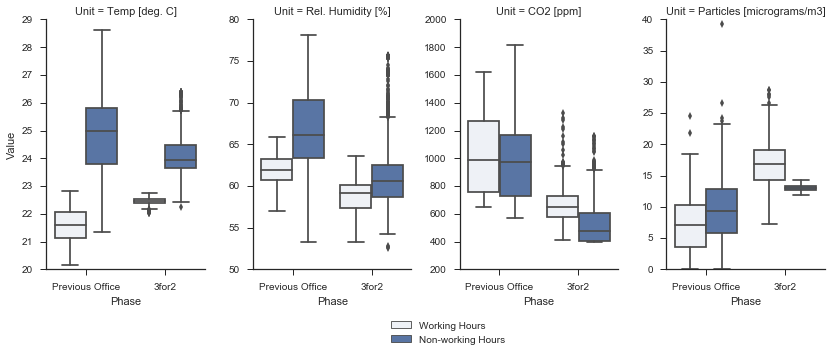

In [86]:
sns.set(style="ticks")
# plt.figure(figsize=[16,5])
plt.rcParams["figure.figsize"] = (15,4)

# fig1.suptitle("All Point", fontsize=14, y=1.03)
g = sns.FacetGrid(alldata, col="Unit", size=4.5, aspect=.65, sharey=False)
g = g.map(sns.boxplot,"Phase",  "Value","Occupancy Type")#.add_legend(title="Phase")
# sns.despine(offset=10, trim=True)
sns.plt.legend(loc='upper left',bbox_to_anchor=(-1.8,-0.17))

plt.savefig("./figures/Pre_and_Post_3for2_NoVOC_withnewParticles.pdf")
alldata.to_csv("./extracted_data/AllData.csv")